In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['job']= df['job'].astype('category')
df['job']= df['job'].cat.codes

df['marital'] = df['marital'].astype('category')
df['marital'] = df['marital'].cat.codes

df['education'] = df['education'].astype('category')
df['education'] = df['education'].cat.codes

df['default'] = df['default'].astype('category')
df['default'] = df['default'].cat.codes

df['housing'] = df['housing'].astype('category')
df['housing'] = df['housing'].cat.codes

df["loan"] = df["loan"].astype('category')
df["loan"] = df["loan"].cat.codes

df["contact"] = df["contact"].astype('category')
df["contact"] = df["contact"].cat.codes

df["month"] = df["month"].astype('category')
df["month"] = df["month"].cat.codes

df["poutcome"] = df["poutcome"].astype('category')
df["poutcome"] = df["poutcome"].cat.codes

df["y"] = df["y"].astype('category')
df["y"] = df["y"].cat.codes

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [9]:
no_count = len(df[df['y']==0])
yes_count = len(df[df['y']==1])

In [11]:
(yes_count/ (yes_count + no_count))*100

11.698480458295547

- Only 11.69% clients has subscribed a term deposit.

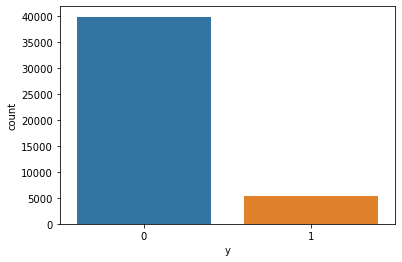

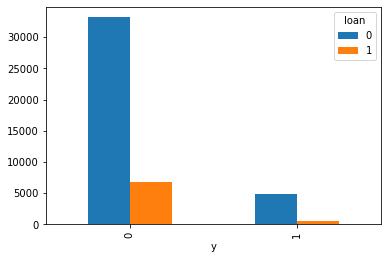

In [12]:
sns.countplot(x='y', data=df)
pd.crosstab(df.y, df.loan).plot(kind = 'bar')
plt.show()

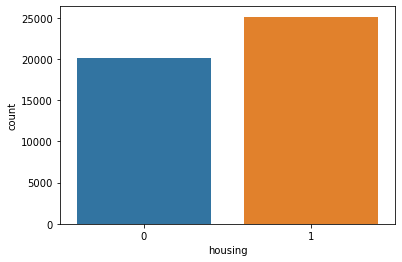

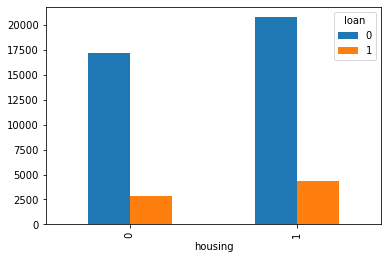

In [13]:
sns.countplot(x = 'housing', data= df)
pd.crosstab(df.housing, df.loan).plot(kind='bar')
plt.show()

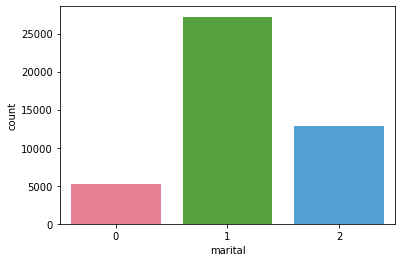

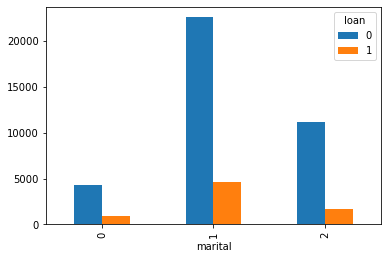

In [14]:
sns.countplot(x = 'marital', data =df, palette='husl')
pd.crosstab(df.marital, df.loan).plot(kind='bar')
plt.show()

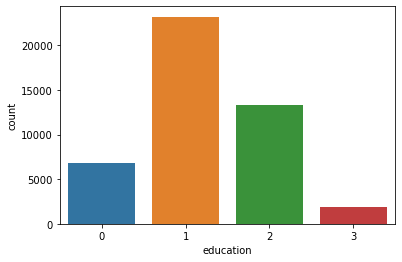

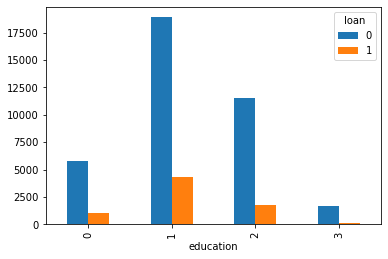

In [15]:
sns.countplot(x='education', data=df)
pd.crosstab(df.education, df.loan).plot(kind='bar')
plt.show()

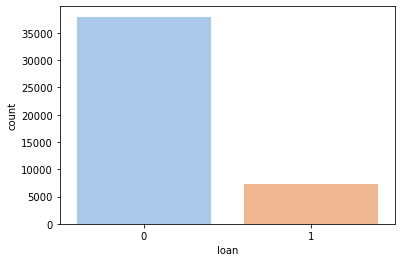

In [16]:
sns.countplot(x='loan', data=df, palette='pastel')
plt.show()


# Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = df.iloc[:, [16]]

classifier = LogisticRegression()
classifier.fit(x,y)

classifier.coef_     
classifier.predict_proba (x)  

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.94851001, 0.05148999],
       [0.94883731, 0.05116269],
       [0.94693167, 0.05306833],
       ...,
       [0.67160154, 0.32839846],
       [0.94032277, 0.05967723],
       [0.58146525, 0.41853475]])

In [19]:
y_pred = classifier.predict(x)
df['y_pred'] = y_pred
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0


In [20]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
y_prob

,0,1
0,0.948510,0.051490
1,0.948837,0.051163
2,0.946932,0.053068
3,0.960844,0.039156
4,0.903297,0.096703
...,...,...
45206,0.615105,0.384895
45207,0.920118,0.079882
45208,0.671602,0.328398
45209,0.940323,0.059677


In [21]:
df1 = pd.concat([df, y_prob], axis =1).sort_index()
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948510,0.051490
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948837,0.051163
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946932,0.053068
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960844,0.039156
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903297,0.096703


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix = confusion_matrix(y , y_pred)
confusion_matrix

array([[39279,   643],
       [ 4437,   852]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [26]:
print('Accuracy: ',metrics.accuracy_score(y, y_pred))  

Accuracy:  0.8876379642122493


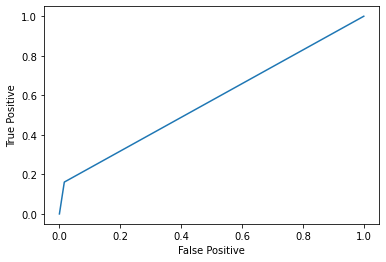

0.5724913226281891


In [27]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(df.y, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
plt.show()
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
print(roc_auc)
